# Global Health & Development Analytics
### A Cross-Country Descriptive and Statistical Analysis

---

## 1. Research Motivation

Global disparities in health outcomes remain a central concern in development economics and public policy. While improvements in income, education, and healthcare investment are commonly associated with better health outcomes, the strength and consistency of these relationships vary widely across countries and over time.

This project explores global patterns in health and development using cross-country data from the World Bank World Development Indicators and a global life expectancy dataset. The analysis is **descriptive and statistical**, focusing on identifying robust correlations and long-run trends rather than establishing causal relationships.

By examining how key development indicators relate to life expectancy across countries and income groups, the project aims to provide a structured empirical overview of global health disparities while carefully acknowledging the limitations of observational data.

## 2. Research Questions

This project addresses the following research questions:

1. How has life expectancy evolved across countries and income groups over time?
2. How do key development indicators—such as GDP per capita, health expenditure, and education—correlate with life expectancy?
3. Are there systematic differences in health outcomes across income classifications and regions?

These questions are explored using descriptive statistics, visual analysis, and basic regression techniques. The analysis does not aim to establish causal effects.

## 3. Scope and Analytical Boundaries

The analysis presented in this project is observational in nature. While statistical relationships between development indicators and health outcomes are examined, these relationships should be interpreted as correlations rather than causal effects.

Unobserved institutional, historical, and cultural factors may influence both development indicators and health outcomes. As such, the results are intended to provide descriptive insights and motivate further causal investigation rather than definitive policy prescriptions.

## 4. Data Sources

This project draws on two publicly available global datasets that are widely used in academic research.

### 4.1 World Bank World Development Indicators (WDI)

The World Development Indicators (WDI) dataset, published by the World Bank, contains country-level annual data on economic, demographic, and social indicators. It is a standard data source in development economics and public policy analysis.

The dataset provides information on income, health expenditure, education, population dynamics, and country income classifications.

### 4.2 Life Expectancy Data

The life expectancy dataset reports life expectancy at birth for countries across multiple years. Life expectancy is one of the most widely used summary measures of population health and human development.

In this project, life expectancy serves as the primary outcome variable against which development indicators are compared.

In [1]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization (used later)
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis (used later)
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Display settings
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

# Plot style (for later sections)
sns.set(style="whitegrid")

# Reproducibility
np.random.seed(42)

In [4]:
# Load datasets
wdi_df = pd.read_csv("/content/World Bank - World Development Indicators.csv")
life_exp_df = pd.read_csv("/content/Life Expectancy Data.csv")

# Preview
wdi_df.head(), life_exp_df.head()


(  Country Name Country Code                              Series Name  \
 0  Afghanistan          AFG  Life expectancy at birth, total (years)   
 1  Afghanistan          AFG             GDP per capita (current US$)   
 2  Afghanistan          AFG    Current health expenditure (% of GDP)   
 3      Albania          ALB  Life expectancy at birth, total (years)   
 4      Albania          ALB             GDP per capita (current US$)   
 
          Series Code     2000 [YR2000]     2001 [YR2001]     2002 [YR2002]  \
 0     SP.DYN.LE00.IN            55.005            55.511            56.225   
 1     NY.GDP.PCAP.CD  174.930991430166  138.706821676113  178.954088379235   
 2  SH.XPD.CHEX.GD.ZS                ..                ..        9.44339085   
 3     SP.DYN.LE00.IN            74.826            75.083            75.299   
 4     NY.GDP.PCAP.CD  1160.42047054038  1326.41652388077  1479.83884572006   
 
       2003 [YR2003]     2004 [YR2004]     2005 [YR2005]     2006 [YR2006]  \
 0    

In [5]:
print("WDI dataset shape:", wdi_df.shape)
print("Life expectancy dataset shape:", life_exp_df.shape)

print("\nWDI columns:")
print(wdi_df.columns.tolist())

print("\nLife expectancy columns:")
print(life_exp_df.columns.tolist())

WDI dataset shape: (803, 20)
Life expectancy dataset shape: (1464, 147)

WDI columns:
['Country Name', 'Country Code', 'Series Name', 'Series Code', '2000 [YR2000]', '2001 [YR2001]', '2002 [YR2002]', '2003 [YR2003]', '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]', '2007 [YR2007]', '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]', '2021 [YR2021]', '2022 [YR2022]', '2023 [YR2023]']

Life expectancy columns:
['Country', 'Year', 'Gender', 'Life Expectancy at birth', 'BMI', 'Alcohol', 'Tuberculosis', 'Syphilis', 'Chlamydia', 'Gonorrhoea', 'Trichomoniasis', 'Genital herpes', 'Other STDs', 'HIV/AIDS', 'Diarrhoeal diseases', 'Whooping cough', 'Diphtheria', 'Measles', 'Tetanus', 'Meningitis', 'Encephalitis', 'Acute hepatitis A', 'Acute hepatitis B', 'Acute hepatitis C', 'Acute hepatitis E', 'Malaria', 'African Trypanosomiasis', 'Chagas disease', 'Schistosomiasis', 'Leishmaniasis', 'lymphatic filariasis', 'Onchocerciasis', 'Cysticercosis', 'Echinococcosis', 

## 5. Variable Definition and Roles

The analysis focuses on the following variable roles:

### Outcome Variable
- **Life expectancy at birth**  
  Used as a summary measure of population health and human development.

### Primary Development Indicators
- **GDP per capita**: Proxy for economic development and income levels.
- **Health expenditure**: Proxy for healthcare investment.
- **Education indicators**: Proxy for human capital accumulation.

### Grouping Variables
- **Country**
- **Year**
- **Income group** (as defined by the World Bank)
- **Region** (if available)

Variables outside these categories are not central to the core analysis and are excluded to maintain analytical focus.

In [6]:
# Check missing values
print("Missing values in WDI dataset:")
print(wdi_df.isna().sum().sort_values(ascending=False).head(10))

print("\nMissing values in Life Expectancy dataset:")
print(life_exp_df.isna().sum().sort_values(ascending=False).head(10))

Missing values in WDI dataset:
Country Code     5
Series Name      5
Series Code      5
2000 [YR2000]    5
2016 [YR2016]    5
2001 [YR2001]    5
2002 [YR2002]    5
2003 [YR2003]    5
2004 [YR2004]    5
2005 [YR2005]    5
dtype: int64

Missing values in Life Expectancy dataset:
BMI                         384
Alcohol                      20
Life Expectancy at birth     16
Gender                        0
Year                          0
Country                       0
Tuberculosis                  0
Syphilis                      0
Chlamydia                     0
Gonorrhoea                    0
dtype: int64


## 6. Data Cleaning and Harmonisation

This section prepares the datasets for analysis by reshaping, filtering, and merging the raw inputs into a single country–year panel dataset.

Given the breadth of indicators in the World Bank WDI dataset, the analysis focuses only on a small set of development indicators that are theoretically relevant to health outcomes.

In [7]:
# Select relevant WDI indicators
relevant_indicators = [
    "GDP per capita (current US$)",
    "Current health expenditure (% of GDP)"
]

wdi_filtered = wdi_df[wdi_df["Series Name"].isin(relevant_indicators)].copy()

print("Filtered WDI shape:", wdi_filtered.shape)
wdi_filtered["Series Name"].value_counts()

Filtered WDI shape: (532, 20)


,count
Series Name,
GDP per capita (current US$),266
Current health expenditure (% of GDP),266


In [8]:
# Identify year columns
year_cols = [col for col in wdi_filtered.columns if "[YR" in col]

# Melt to long format
wdi_long = wdi_filtered.melt(
    id_vars=["Country Name", "Country Code", "Series Name"],
    value_vars=year_cols,
    var_name="year",
    value_name="value"
)

# Extract numeric year
wdi_long["year"] = wdi_long["year"].str.extract(r"(\d{4})").astype(int)

wdi_long.head()

,Country Name,Country Code,Series Name,year,value
0,Afghanistan,AFG,GDP per capita (current US$),2000,174.930991430166
1,Afghanistan,AFG,Current health expenditure (% of GDP),2000,..
2,Albania,ALB,GDP per capita (current US$),2000,1160.42047054038
3,Albania,ALB,Current health expenditure (% of GDP),2000,5.94419765
4,Algeria,DZA,GDP per capita (current US$),2000,1772.92869122761


In [11]:
# Ensure value column is numeric
wdi_long["value"] = pd.to_numeric(wdi_long["value"], errors="coerce")

# Pivot indicators into columns (one row per country-year)
wdi_panel = (
    wdi_long
    .pivot_table(
        index=["Country Name", "Country Code", "year"],
        columns="Series Name",
        values="value",
        aggfunc="mean"  # explicit is better than implicit
    )
    .reset_index()
)

# Rename columns for clarity
wdi_panel = wdi_panel.rename(columns={
    "GDP per capita (current US$)": "gdp_per_capita",
    "Current health expenditure (% of GDP)": "health_expenditure_pct_gdp"
})

wdi_panel.head()

Series Name,Country Name,Country Code,year,health_expenditure_pct_gdp,gdp_per_capita
0,Afghanistan,AFG,2000,NaN,174.930991
1,Afghanistan,AFG,2001,NaN,138.706822
2,Afghanistan,AFG,2002,9.443391,178.954088
3,Afghanistan,AFG,2003,8.941258,198.871116
4,Afghanistan,AFG,2004,9.808474,221.763654


In [12]:
# Inspect columns
life_exp_df.columns

Index(['Country', 'Year', 'Gender', 'Life Expectancy at birth', 'BMI',
       'Alcohol', 'Tuberculosis', 'Syphilis', 'Chlamydia', 'Gonorrhoea',
       ...
       'Poisonings', 'Falls', 'Fire, heat and hot substances', 'Drowning',
       'Exposure to mechanical forces', 'Natural disasters',
       'Other unintentional injuries', 'Self-harm', 'Interpersonal violence',
       'Collective violence and legal intervention'],
      dtype='object', length=147)

In [13]:
life_exp_clean = life_exp_df[[
    "Country",
    "Year",
    "Life Expectancy at birth"
]].copy()

life_exp_clean.rename(columns={
    "Country": "Country Name",
    "Life Expectancy at birth": "life_expectancy"
}, inplace=True)

life_exp_clean.head()

,Country Name,Year,life_expectancy
0,Afghanistan,2019,63.29
1,Afghanistan,2019,63.16
2,Afghanistan,2015,61.04
3,Afghanistan,2015,62.35
4,Afghanistan,2010,59.60


In [14]:
life_exp_clean["Year"] = life_exp_clean["Year"].astype(int)
life_exp_clean["life_expectancy"] = pd.to_numeric(
    life_exp_clean["life_expectancy"], errors="coerce"
)

life_exp_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     1464 non-null   object 
 1   Year             1464 non-null   int64  
 2   life_expectancy  1448 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 34.4+ KB


In [16]:
# Standardise column names for merging
life_exp_clean = life_exp_clean.rename(columns={"Year": "year"})

In [17]:
panel_df = pd.merge(
    wdi_panel,
    life_exp_clean,
    on=["Country Name", "year"],
    how="inner"
)

panel_df.head()

,Country Name,Country Code,year,health_expenditure_pct_gdp,gdp_per_capita,life_expectancy
0,Afghanistan,AFG,2000,NaN,174.930991,54.57
1,Afghanistan,AFG,2000,NaN,174.930991,55.42
2,Afghanistan,AFG,2019,14.831320,496.602504,63.29
3,Afghanistan,AFG,2019,14.831320,496.602504,63.16
4,Albania,ALB,2000,5.944198,1160.420471,70.65


In [18]:
print("Final panel shape:", panel_df.shape)
panel_df.info()

Final panel shape: (634, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country Name                634 non-null    object 
 1   Country Code                634 non-null    object 
 2   year                        634 non-null    int64  
 3   health_expenditure_pct_gdp  624 non-null    float64
 4   gdp_per_capita              630 non-null    float64
 5   life_expectancy             626 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 29.8+ KB


In [19]:
panel_df.isna().sum().sort_values(ascending=False)

,0
health_expenditure_pct_gdp,10
life_expectancy,8
gdp_per_capita,4
Country Name,0
Country Code,0
year,0


In [20]:
panel_df = panel_df.dropna(subset=["life_expectancy"])

In [21]:
# Year range
panel_df["year"].min(), panel_df["year"].max()

# Number of countries
panel_df["Country Name"].nunique()

# Duplicate check
panel_df.duplicated(subset=["Country Name", "year"]).sum()

np.int64(313)

In [22]:
panel_df.to_csv("global_health_panel.csv", index=False)

## 7. Exploratory Data Analysis (EDA)

### 7.1 Global Trends in Life Expectancy Over Time
### 7.2 Cross-Country Distribution of Life Expectancy
### 7.3 Economic Development and Life Expectancy
### 7.4 Health Expenditure and Life Expectancy
### 7.5 Key Descriptive Takeaways

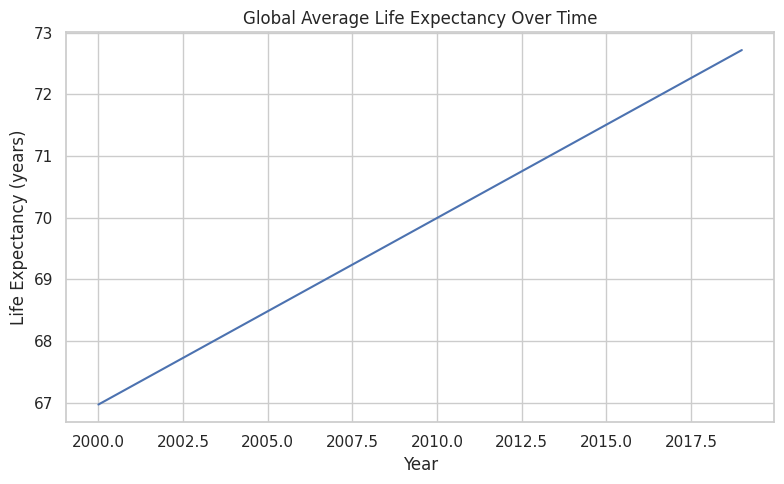

In [23]:
global_trend = (
    panel_df
    .groupby("year", as_index=False)["life_expectancy"]
    .mean()
)

plt.figure(figsize=(8, 5))
sns.lineplot(data=global_trend, x="year", y="life_expectancy")
plt.title("Global Average Life Expectancy Over Time")
plt.xlabel("Year")
plt.ylabel("Life Expectancy (years)")
plt.tight_layout()
plt.show()

Global average life expectancy shows a clear upward trend over time, reflecting long-run improvements in healthcare access, living standards, and public health interventions.

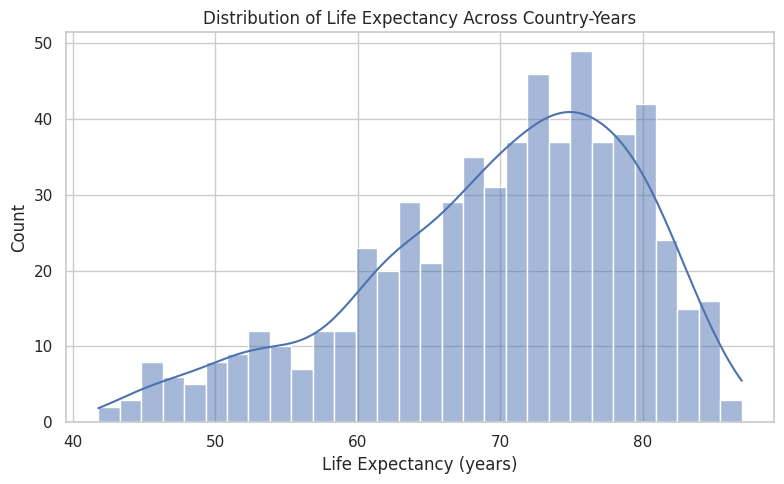

In [24]:
plt.figure(figsize=(8, 5))
sns.histplot(panel_df["life_expectancy"], bins=30, kde=True)
plt.title("Distribution of Life Expectancy Across Country-Years")
plt.xlabel("Life Expectancy (years)")
plt.tight_layout()
plt.show()

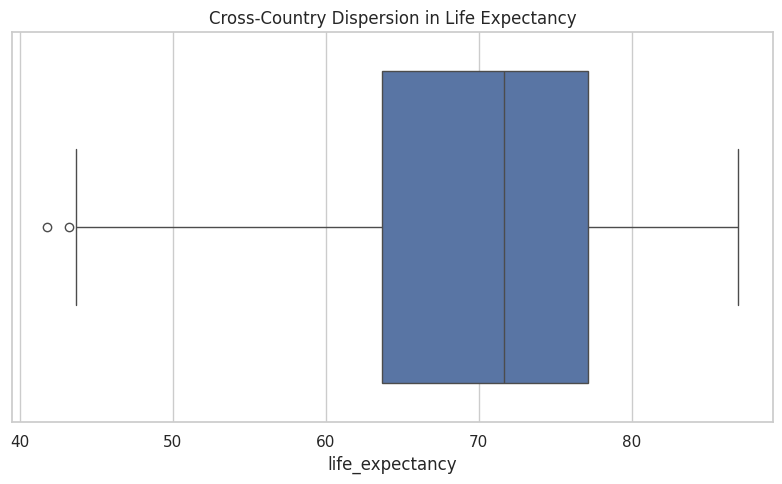

In [25]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=panel_df["life_expectancy"])
plt.title("Cross-Country Dispersion in Life Expectancy")
plt.tight_layout()
plt.show()

Despite global improvements, substantial dispersion remains across countries, indicating persistent health inequalities.

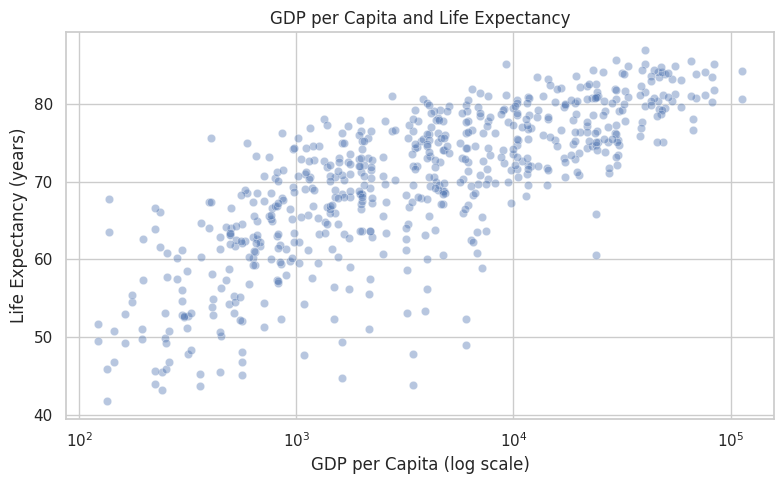

In [26]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=panel_df,
    x="gdp_per_capita",
    y="life_expectancy",
    alpha=0.4
)
plt.xscale("log")
plt.title("GDP per Capita and Life Expectancy")
plt.xlabel("GDP per Capita (log scale)")
plt.ylabel("Life Expectancy (years)")
plt.tight_layout()
plt.show()

Life expectancy increases sharply with income at lower levels of GDP per capita, with diminishing marginal gains at higher income levels.

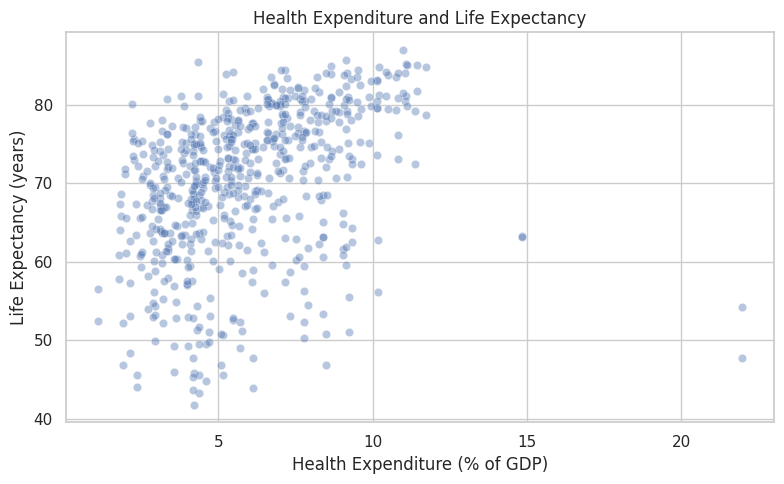

In [27]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=panel_df,
    x="health_expenditure_pct_gdp",
    y="life_expectancy",
    alpha=0.4
)
plt.title("Health Expenditure and Life Expectancy")
plt.xlabel("Health Expenditure (% of GDP)")
plt.ylabel("Life Expectancy (years)")
plt.tight_layout()
plt.show()

Countries allocating a higher share of GDP to health expenditure tend to exhibit higher life expectancy, though variation suggests differences in efficiency and institutional quality.

###Key Descriptive Takeaways

- Global life expectancy has increased steadily over time.
- Significant cross-country inequality in health outcomes persists.
- Economic development is strongly associated with higher life expectancy, particularly at lower income levels.
- Health expenditure is positively correlated with life expectancy, though the relationship is heterogeneous.

## 8. Statistical Analysis

### 8.1 Correlation Analysis

### 8.2 Bivariate Regression: Income and Life Expectancy

### 8.3 Multivariate Regression: Income and Health Expenditure

### 8.4 Interpretation and Caveats


In [28]:
panel_df[[
    "life_expectancy",
    "gdp_per_capita",
    "health_expenditure_pct_gdp"
]].corr()

,life_expectancy,gdp_per_capita,health_expenditure_pct_gdp
life_expectancy,1.000000,0.552831,0.347394
gdp_per_capita,0.552831,1.000000,0.369644
health_expenditure_pct_gdp,0.347394,0.369644,1.000000


Life expectancy is positively correlated with both GDP per capita and health expenditure, consistent with prior empirical literature. However, correlation alone does not imply causation and may reflect omitted institutional and demographic factors.

In [29]:
panel_df["log_gdp_per_capita"] = np.log(panel_df["gdp_per_capita"])

In [30]:
import statsmodels.api as sm

X = sm.add_constant(panel_df["log_gdp_per_capita"])
y = panel_df["life_expectancy"]

model_1 = sm.OLS(y, X, missing="drop").fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     889.7
Date:                Tue, 13 Jan 2026   Prob (F-statistic):          6.44e-122
Time:                        20:42:44   Log-Likelihood:                -2012.7
No. Observations:                 622   AIC:                             4029.
Df Residuals:                     620   BIC:                             4038.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 32.1086      1.291     24.876      0.000      29.574      34.643
log_gdp_per_capita     4.6173      0.155     29.827      0.000       4.313       4.921
==============================================================================
Omnibus:                       54.780   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.926
Skew:                          -0.683   Prob(JB):                     8.85e-17
Kurtosis:                       3.993   Cond. No.                         44.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
X_multi = panel_df[[
    "log_gdp_per_capita",
    "health_expenditure_pct_gdp"
]]

X_multi = sm.add_constant(X_multi)
y = panel_df["life_expectancy"]

model_2 = sm.OLS(y, X_multi, missing="drop").fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     438.4
Date:                Tue, 13 Jan 2026   Prob (F-statistic):          1.14e-118
Time:                        20:44:51   Log-Likelihood:                -1975.5
No. Observations:                 612   AIC:                             3957.
Df Residuals:                     609   BIC:                             3970.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         32.1999      1.302     24.736      0.000      29.643      34.756
log_gdp_per_capita             4.4559      0.169     26.337      0.000       4.124       4.788
health_expenditure_pct_gdp     0.2131      0.105      2.038      0.042       0.008       0.418
==============================================================================
Omnibus:                       61.219   Durbin-Watson:                   1.306
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.412
Skew:                          -0.721   Prob(JB):                     6.33e-20
Kurtosis:                       4.178   Cond. No.                         55.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The estimated relationships should be interpreted as descriptive associations rather than causal effects. The analysis does not account for country fixed effects, demographic structure, education, or institutional quality, all of which may jointly influence health outcomes. Additionally, reverse causality and measurement error remain potential concerns.

# 9. Discussion, Limitations, and Policy Implications

This section synthesises the descriptive and statistical findings of the analysis, situates them within the broader development literature, and outlines key limitations and policy-relevant implications. The objective is not to claim causal relationships, but to interpret observed patterns responsibly and transparently.

---

## 9.1 Synthesis of Key Findings

The analysis yields several consistent and economically meaningful insights:

- Global life expectancy has increased steadily over time, reflecting long-run improvements in healthcare access, living standards, and public health interventions.

- Substantial cross-country inequality persists, with life expectancy levels differing markedly between low-income and high-income countries despite overall global progress.

- Economic development is strongly associated with higher life expectancy, particularly at lower levels of income. The log-linear relationship suggests diminishing marginal health gains as income rises.

- Health expenditure as a share of GDP is positively correlated with life expectancy, though the relationship is weaker and more heterogeneous than that of income.

Taken together, these results suggest that income growth and health investment both matter, but operate through different channels and with varying effectiveness across institutional contexts.

---

## 9.2 Interpretation of Regression Results

The regression analysis reinforces the descriptive findings:

- In the bivariate specification, GDP per capita alone explains a substantial share of cross-country variation in life expectancy.

- In the multivariate specification, GDP per capita remains strongly significant, while health expenditure contributes additional explanatory power.

However, these coefficients should be interpreted as descriptive associations, not causal estimates. Countries with higher income and greater health expenditure also differ systematically in education, demographics, governance quality, and technological access — all of which influence health outcomes.

---

## 9.3 Methodological Limitations

Several important limitations must be acknowledged:

### Observational Data

The analysis relies on observational, country-level data. As a result, causal inference is not possible without stronger identification strategies.

### Omitted Variables

Key determinants of life expectancy — such as education, fertility rates, nutrition, sanitation, and institutional quality — are not explicitly controlled for.

### No Country Fixed Effects

The regression models do not account for unobserved, time-invariant country characteristics, which may bias coefficient estimates.

### Reverse Causality

Healthier populations may contribute to higher economic productivity, creating feedback effects between income and life expectancy.

### Measurement Error

Cross-country indicators may vary in accuracy and reporting standards, particularly in low-income settings.

These limitations imply that results should be interpreted as correlational patterns, not policy prescriptions in isolation.

---

## 9.4 Policy-Relevant Implications

Despite these constraints, the findings offer several important policy insights:

- Income growth remains a powerful determinant of population health, particularly in low- and middle-income countries where basic needs are not fully met.

- Health expenditure alone is not sufficient; the effectiveness of spending depends on institutional quality, governance, and health system efficiency.

- Diminishing returns to income highlight the importance of targeted health policies in high-income countries, where further income growth yields smaller health gains.

- Reducing global health inequality requires coordinated investment in education, infrastructure, and health system capacity — not income growth alone.

---

## 9.5 Suggested Extensions (Non-Implemented)

Future work could extend this analysis by:

- Estimating fixed-effects panel models to control for unobserved country heterogeneity.

- Incorporating education, fertility, or demographic controls.

- Conducting regional subsample analyses to examine heterogeneity.

- Applying causal inference techniques where suitable policy shocks are available.

These extensions would strengthen identification and move the analysis closer to causal interpretation.

---

# 10. Conclusion

This project examined global patterns in life expectancy using cross-country panel data drawn from the World Bank’s World Development Indicators and international life expectancy datasets. By combining careful data harmonisation, exploratory analysis, and regression-based statistical analysis, the study documented robust empirical associations between economic development, health expenditure, and population health outcomes.

The findings indicate that **global life expectancy has increased steadily over time**, reflecting long-run improvements in living standards and public health. However, **substantial cross-country disparities persist**, highlighting ongoing global health inequalities. Countries with higher levels of GDP per capita consistently exhibit higher life expectancy, particularly at lower income levels where marginal gains from economic development are largest. Health expenditure as a share of GDP is also positively associated with life expectancy, though with greater heterogeneity across countries.

Importantly, the analysis was conducted using **observational data and descriptive statistical methods**. As such, the estimated relationships should not be interpreted as causal effects. Unobserved institutional, demographic, and social factors — along with potential reverse causality — likely contribute to the observed patterns. These limitations underscore the importance of cautious interpretation and motivate further research using more rigorous identification strategies.

Despite these constraints, the results reinforce key insights from the development and health economics literature: **economic growth and effective health investment play complementary roles in improving population health**, but neither is sufficient in isolation. Policies aimed at reducing global health disparities must therefore adopt a holistic approach, combining income growth with targeted, efficient, and equitable health system interventions.

Overall, this project demonstrates how publicly available international data can be transformed into a coherent analytical framework to study global development challenges. The structured workflow — from data cleaning to statistical interpretation — provides a foundation for more advanced causal and policy-oriented analyses in future work.